***** Treino *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

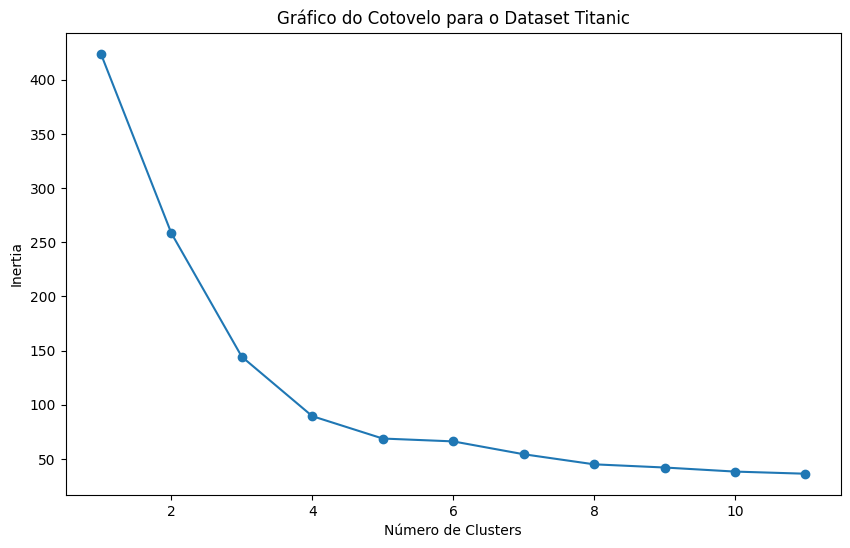

Initialization complete
Iteration 0, inertia 245.22286286131376.
Iteration 1, inertia 133.54666303628198.
Iteration 2, inertia 133.32570698924712.
Converged at iteration 2: strict convergence.
Cluster     0    1    2
Survived               
0         300   81  168
1          47  233   62






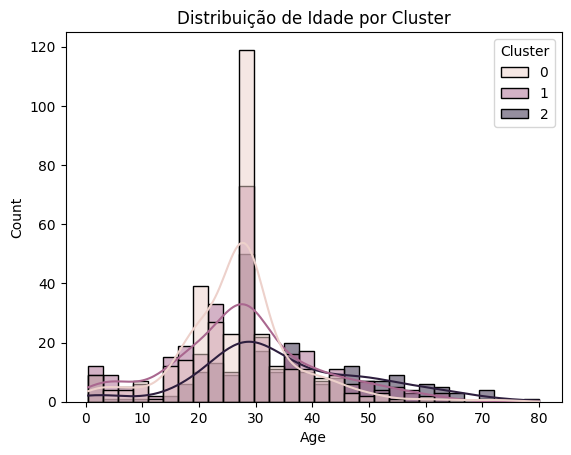

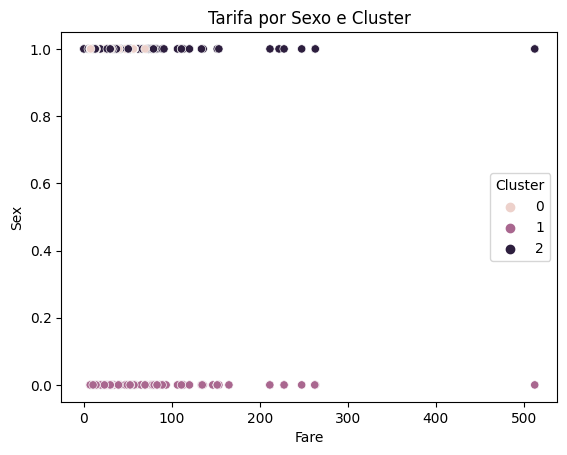

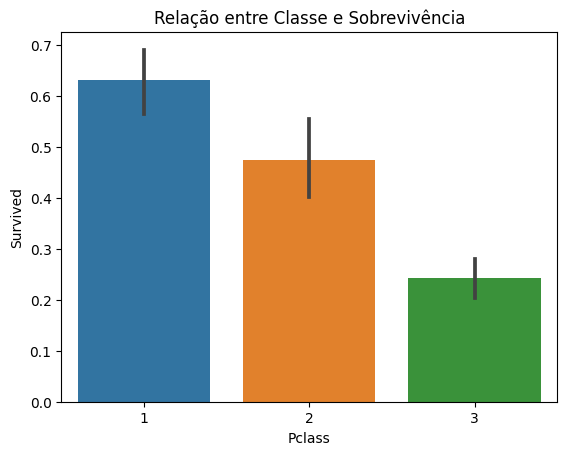

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Carregando os dados
treino = pd.read_csv('data/train.csv')
teste = pd.read_csv('data/test.csv')

print("***** Treino *****")
print(treino.head())
print("\n")
print("***** Teste *****")
print(teste.head())
print("\n")
print("\n")
print("***** Treino *****")
print(treino.describe())
print("\n")
print("***** Teste *****")
print(teste.describe())

print("\n")
print("***** Colunas de Treino *****")
print(treino.columns.values)
print("\n")
print("\n")
# Campos vazios na lista de treino retornam o valor True abaixo
treino.isna().head()

# # Campos vazios na lista de teste retornam o valor True abaixo
teste.isna().head()

print("***** Quantidade de campos vazios no Treino *****")
print(treino.isna().sum())
print("\n")
print("***** Quantidade de campos vazios no Teste *****")
print(teste.isna().sum())

# Tratamento de valores faltantes
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0]}, inplace=True)
teste.fillna({'Age': teste['Age'].median(), 'Embarked': teste['Embarked'].mode()[0]}, inplace=True)

# Remoção de colunas não numéricas
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked','PassengerId']
treino.drop(colunas_para_remover, axis=1, inplace=True)
teste.drop(colunas_para_remover, axis=1, inplace=True)

# Convertendo variáveis categóricas (AQUI PRECISO QUE VC ANALISE)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])
teste['Sex'] = labelEncoder.transform(teste['Sex'])

# Normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(treino.drop(['Survived'], axis=1))
y = treino['Survived']

# Calculando a soma dos quadrados dentro dos clusters para diferentes números de clusters (AQUI PRECISO QUE VC ANALISE adpatei essa parte do site)
inertia = []
K_range = range(1, 12)
for k in K_range:
    #kmeans = KMeans(n_clusters=k, max_iter=600, algorithm='auto')
    kmeans = KMeans(n_clusters=k, max_iter=600, n_init="auto",random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

print("\n")
print("\n")
# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Gráfico do Cotovelo para o Dataset Titanic')
plt.show()

# Aplicando K-Means
#kmeans = KMeans(n_clusters=2, max_iter=600, algorithm='auto')
kmeans = KMeans(n_clusters=3, max_iter=600, n_init="auto",verbose=1)
kmeans.fit(X)

# Avaliando a correspondência entre os clusters e a sobrevivência
treino['Cluster'] = kmeans.labels_
correspondencia = pd.crosstab(treino['Survived'], treino['Cluster'])
print(correspondencia)

print("\n")
print("\n")
# Visualizações
# Distribuição de idade por cluster
sns.histplot(data=treino, x='Age', hue='Cluster', kde=True)
plt.title('Distribuição de Idade por Cluster')
plt.show()

# Distribuição de tarifa por sexo, colorida por cluster (AQUI ESTAVA COLOcando pra testar mas nao sei se faz sentido)
sns.scatterplot(data=treino, x='Fare', y='Sex', hue='Cluster')
plt.title('Tarifa por Sexo e Cluster')
plt.show()

# Relação entre Pclass e Sobrevivência
sns.barplot(x='Pclass', y='Survived', data=treino)
plt.title('Relação entre Classe e Sobrevivência')
plt.show()


Para avaliar métricas de cluster, consultar: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [60]:
treino.loc[treino.Cluster==1].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
count,455.000000,455.000000,455.0,455.000000,455.000000,455.000000,455.000000,455.0
mean,0.140659,2.762637,1.0,27.766484,0.461538,0.224176,14.342196,1.0
std,0.348052,0.425935,0.0,11.495037,1.160166,0.599438,12.867565,0.0
min,0.000000,2.000000,1.0,0.420000,0.000000,0.000000,0.000000,1.0
25%,0.000000,3.000000,1.0,22.000000,0.000000,0.000000,7.775000,1.0
50%,0.000000,3.000000,1.0,28.000000,0.000000,0.000000,8.050000,1.0
75%,0.000000,3.000000,1.0,32.000000,0.000000,0.000000,15.172900,1.0
max,1.000000,3.000000,1.0,74.000000,8.000000,5.000000,73.500000,1.0


In [27]:
labelEncoder.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [59]:
treino.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.995511
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.699905
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<Axes: xlabel='Cluster', ylabel='Pclass'>

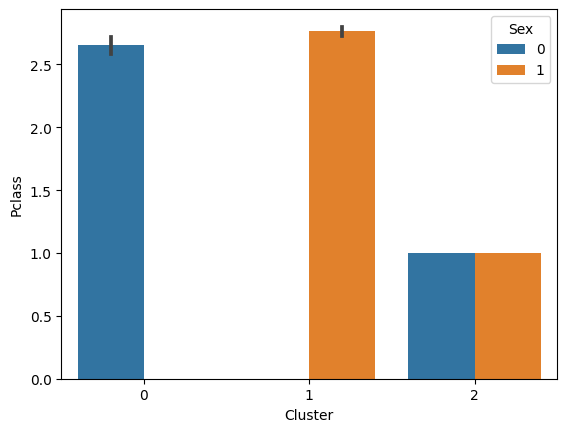

In [66]:
sns.barplot(x='Cluster', y='Pclass',hue="Sex", data=treino)

<Axes: xlabel='Cluster', ylabel='Survived'>

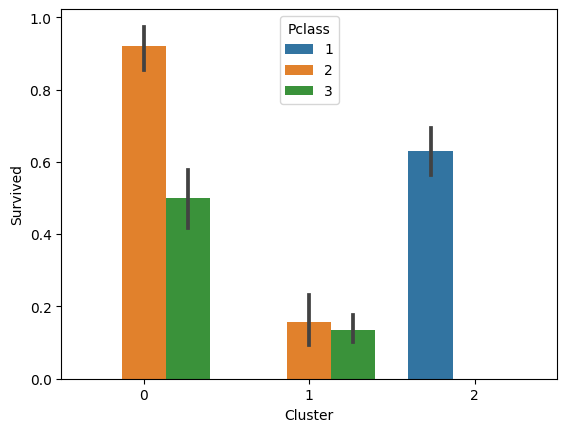

In [68]:
sns.barplot(x='Cluster', y='Survived',hue="Pclass", data=treino)